<a href="https://colab.research.google.com/github/siddheshsp0/WiDS-Projects/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1a - **Linear Regression from Scratch**
---

## Objective:
The main goal of this assignment is to empower you to comprehend the fundamental steps involved in creating a linear regression model from scratch. By doing so, you'll gain insights into the mechanics of linear regression, including data generation, model creation, training, evaluation, and prediction.

> **NOTE :** You are required to write code only where it is specified by comments. There will be comments in each cell block to guide you, and if there is no comment for a particular cell, no modifications are required for it, simply run that cell.

## Task 1: **Setting Up**
**Purpose:** Importing essential libraries forms the foundation of any data-related task. For this assignment, you must include `numpy`, `sklearn.datasets`, `sklearn.model_selection`, and `matplotlib.pyplot` for numerical computation, dataset generation, data splitting, and visualization, respectively.

## Task 2: **Dataset Generation**
**Purpose:** Generating a synthetic dataset mimics real-world scenarios where data might not be readily available. By using `make_regression` from `sklearn.datasets`, you will create a dataset with 100 samples, one feature, and a noise level of 10. Setting the random state to 42 ensures reproducibility.

## Task 3: **Exploratory Data Analysis (EDA)**
**Purpose:** EDA is crucial for understanding data characteristics. You should visualize the generated dataset using a scatter plot. This visualization helps grasp the relationship between the independent and dependent variables, enabling a better understanding of the data's distribution and patterns.

## Task 4: **Data Splitting**
**Purpose:** Splitting the dataset into training and testing subsets ensures unbiased model evaluation. Using `train_test_split` from `sklearn.model_selection`, you will create an 80-20 split ratio for training and testing, respectively. Setting a random state guarantees consistent splitting.

## Task 5: **Implementing Linear Regression**
**Purpose:** Creating a basic Linear Regression class from scratch solidifies the understanding of the algorithm's inner workings. You need to define methods for model initialization, fitting, prediction, and mean squared error (MSE) calculation. This step emphasizes the core functionality of a linear regression model.

## Task 6: **Model Training**
**Purpose:** Training the linear regression model involves updating its parameters iteratively to minimize the cost function (MSE). You will execute the model training on the training data by utilizing a learning rate of 0.01 and iterating through 1000 epochs.

## Task 7: **Model Evaluation**
**Purpose:** Evaluating the model's performance on separate training and testing sets is crucial for assessing its generalization ability. You will compute the Mean Squared Error (MSE) for both the training and testing sets, providing insights into the model's accuracy.

## Task 8: **Visualize Predictions**
**Purpose:** Visualizing the model's predictions helps comprehend its performance. You will plot the actual test data points alongside the predicted values obtained from the trained model. This visualization aids in understanding how well the model fits the test data.

## Task 1: **Setting Up**

In [1]:
# Import NumPy and Matplotlib.PyPlot here
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

## Task 2: **Dataset Generation**

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

In [ ]:
# Print X and y to get an idea of the dataset we generated
X

In [4]:
y.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [5]:
y

array([  50.77992943,  -10.06527016,  -34.91839191,   10.52674299,
        -17.73837724,   31.56459551,  -30.06888275,    5.91200699,
         23.47337416,   32.34359474,   35.76573341,   76.88323383,
         36.18776792,    2.9244734 ,  -47.81146525,   12.61693126,
        -85.45418019,   20.05162924,   28.63464002, -118.02745409,
         16.77823077,    2.81079984,  -29.36593416,   28.57973536,
         74.71530364,   64.57600193,  -11.01926675,    2.74944415,
        -33.92230425,  -62.09952962,   20.28587171,   29.52220586,
          5.76708113,  -21.69297316,  -43.6490161 ,   -4.01153077,
        -20.19870331,    7.58329135,   51.39997923,    1.74763946,
         22.78482382,  -31.5003787 ,   61.91233294,  -20.69551487,
         -7.6244312 ,   -5.91131407,  -14.17777333,  -38.23228892,
         23.49423306,    8.80963973,   -5.90648058,    7.31453371,
        -29.99628354,   89.03314517,    9.31786907,   24.7816116 ,
         20.00370858,    0.72440436,   -8.86713635,  -85.35925

## Task 3: **Exploratory Data Analysis (EDA)**

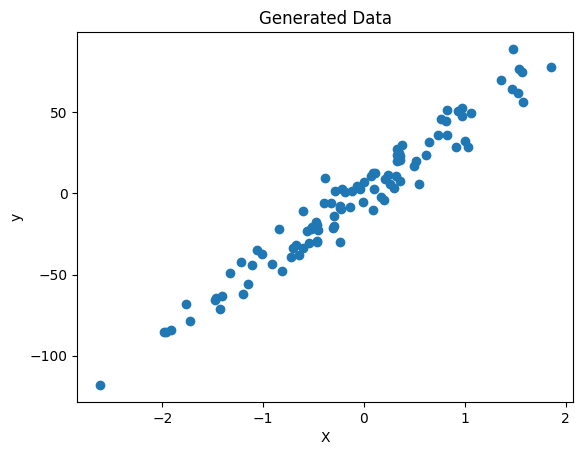

In [6]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

## Task 4: **Data Splitting**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Verify the sizes of training and testing samples by using print statements
type(X_train)
print(X_train.shape)
print(X_test.shape)

(80, 1)
(20, 1)


## Task 5: **Implementing Linear Regression**

In [12]:
# Nothing to modify in this cell
class MyLinearRegression:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Computing gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Updating weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

## Task 6: **Model Training**

In [13]:
# Define the model and train it using learning rate = 0.01 and on 1000 epochs
lr_model = MyLinearRegression(lr=0.01, epochs=1000)
lr_model.fit(X_train, y_train)

## Task 7: **Model Evaluation**

In [15]:
# Use the predict and mse functions of MyLinearRegression class here: (train_mse has been done for you)

train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

train_mse = lr_model.mse(y_train, train_predictions)
test_mse =lr_model.mse(y_test, test_predictions)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 72.92
Test MSE: 104.30


## Task 8: **Visualize Predictions**

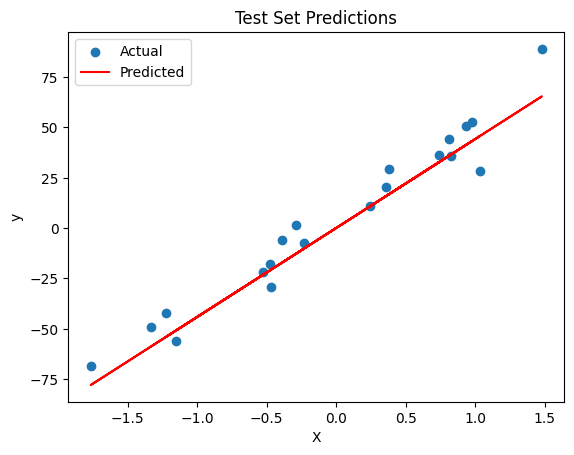

In [16]:
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, test_predictions, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Set Predictions')
plt.legend()
plt.show()


# Assignment 1b: **Logistic Regression from Scratch**
---

## Objective:
Similar to the Linear Regression task, the aim here is to delve into the core workings of Logistic Regression. The steps include importing necessary libraries, generating a synthetic dataset, performing exploratory data analysis (EDA), splitting the dataset, implementing Logistic Regression from scratch, training the model, evaluating its performance, and visualizing predictions.

> **NOTE :** You are required to write code only where it is specified by comments. There will be comments in each cell block to guide you, and if there is no comment for a particular cell, no modifications are required for it, simply run that cell.

## Task 1: **Setting Up**
**Purpose:** Import `numpy`, `sklearn.datasets`, `sklearn.model_selection`, and `matplotlib.pyplot` for numerical computation, dataset generation, data splitting, and visualization.

## Task 2: **Dataset Generation**
**Purpose:** Generate a synthetic dataset using `make_classification` from `sklearn.datasets` with 100 samples, two informative features, one redundant feature, and a noise level of 10. Setting the random state to 42 ensures reproducibility.

## Task 3: **Exploratory Data Analysis (EDA)**
**Purpose:** Visualize the generated dataset using a scatter plot. This aids in understanding the relationship between the features and their classes.

## Task 4: **Data Splitting**
**Purpose:** Split the dataset into training and testing subsets using `train_test_split` from `sklearn.model_selection` with an 80-20 split ratio. Set a random state for consistency.

## Task 5: **Implementing Logistic Regression**
**Purpose:** Create a Logistic Regression class from scratch with methods for model initialization, fitting, prediction, and computing the cross-entropy loss.

## Task 6: **Model Training**
**Purpose:** Train the Logistic Regression model on the training data by iteratively updating its parameters. Use a learning rate of 0.01 and iterate through 1000 epochs.

## Task 7: **Model Evaluation**
**Purpose:** Evaluate the model's performance on both the training and testing sets by computing the accuracy.

## Task 8: **Visualize Predictions**
**Purpose:** Visualize the model's predictions by plotting the actual test data points alongside the predicted values obtained from the trained model.

## Task 1: **Setting Up**

In [17]:
# Import NumPy and Matplotlib.PyPlot here
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Task 2: **Dataset Generation**

In [18]:
# We are dealing with the simple case of a single feature
X, y = make_classification(n_samples=1000, n_features=1, n_informative=1, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

In [ ]:
# Print X and y to get an idea of the dataset we generated
print(X)
print(y)

## Task 3: **Exploratory Data Analysis (EDA)**

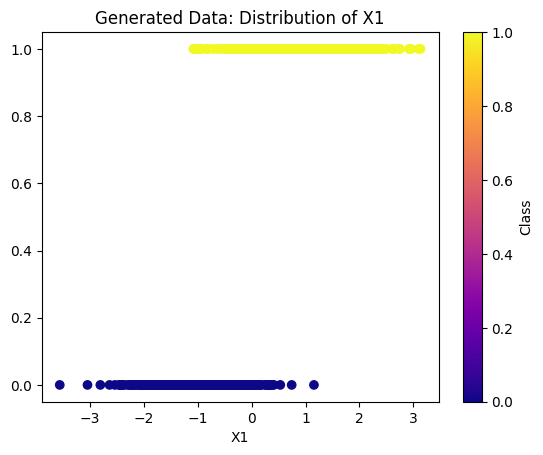

In [21]:
plt.scatter(X[:, 0], y, c=y, cmap='plasma')
plt.xlabel('X1')
plt.title('Generated Data: Distribution of X1')
plt.colorbar(label='Class')
plt.show()

## Task 4: **Data Splitting**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Verify the sizes of training and testing samples by using print statements
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


## Task 5: **Implementing Logistic Regression**

In [24]:
class MyLogisticRegression:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

## Task 6: **Model Training**

In [25]:
# Define the model and train it using learning rate = 0.01 and on 1000 epochs
lr_model = MyLogisticRegression(lr=0.01, epochs=1000)
lr_model.fit(X_train, y_train)

## Task 7: **Model Evaluation**

In [26]:
# Use the predict and mse functions of MyLinearRegression class here: (test_mse has been done for you)

train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

train_accuracy = lr_model.accuracy(y_train, train_predictions)
test_accuracy = lr_model.accuracy(y_test, test_predictions)

print(f"Train Accuracy: {100*train_accuracy:.2f} %")
print(f"Test Accuracy: {100*test_accuracy:.2f} %")

Train Accuracy: 92.00 %
Test Accuracy: 92.00 %


## Task 8: **Visualize Predictions**

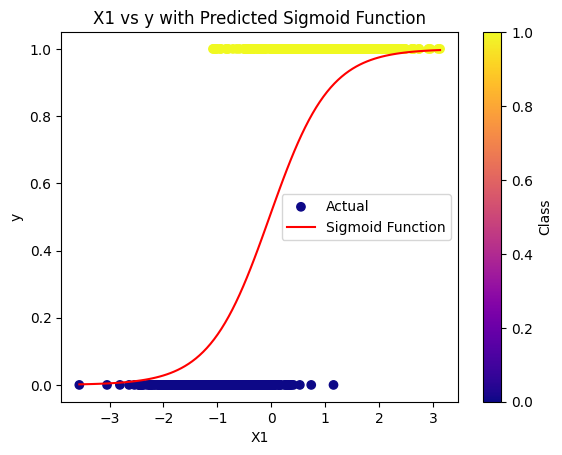

In [27]:
# Make sure lr_model is the trained logistic regression model

# Create a range of values for X1 feature
x1_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)

# Calculate corresponding probabilities using the trained model's sigmoid function
x1_probabilities = lr_model._sigmoid(lr_model.weights[0] * x1_values + lr_model.bias)

plt.scatter(X[:, 0], y, c=y, label='Actual', cmap='plasma')
plt.plot(x1_values, x1_probabilities, color='red', label='Sigmoid Function')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('X1 vs y with Predicted Sigmoid Function')
plt.legend()
plt.colorbar(label='Class')
plt.show()